In [3]:
# This is a brief exploratory data analysis using Pandas for a given public sample of random Reddit posts. We will get a feel of a dataset and try to answer the following questions:

# What are the most popular reddits? Which topics are viral?
# Which posts have been removed and why?
# What % removed reddits are deleted by moderatos?
# Who are the most popular authors?
# Who are the biggest spammers at Reddit platform?

In [7]:
#getting all the packages
import numpy as np #linear algebra
import pandas as pd #data processing

import seaborn as sns #satistics graph package
import matplotlib.pyplot as plt # plot package
import pandasql as ps # sql package
import wordcloud # will user for world cloud plot
from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords

#optional helpful plot stypes:
plt.style.use('bmh') #setting up 'bmh' as "Bayesian Methods for Hackers" style sheet
#plt.style.use('ggplot') #R ggplot stype
#print(plt.style.available) #pick another style

# Reading the dataset

In [43]:
df = pd.read_csv("r_dataisbeautiful_posts.csv")

<ipython-input-43-d229bc79feb5>:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("r_dataisbeautiful_posts.csv")


In [13]:
# df.head()
df.sample(4)

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
154067,2zknqs,"High School, College, Advanced Degree Graduati...",5,PatrickTulip,NaN,NaN,NaN,NaN,1426763251,https://www.reddit.com/r/dataisbeautiful/comme...,4,False
93087,6bueg0,Down the Drain: Wastewater with the Most Cocai...,1,[deleted],NaN,NaN,NaN,NaN,1495087527,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
33431,d6s43d,Solar and Wind Power So Cheap They’re Outgrowi...,181,beavershaw,OC: 14,NaN,0.0,NaN,1568969764,https://www.reddit.com/r/dataisbeautiful/comme...,7,False
30025,dt5e1y,"Saw a post documenting their job search, which...",1,The_Candler,NaN,NaN,0.0,[],1573165121,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [15]:
df.tail()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
183886,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,NaN,NaN,NaN,NaN,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
183887,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,NaN,NaN,NaN,NaN,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
183888,pq922,Wavii.,13,ddshroom,NaN,NaN,NaN,NaN,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
183889,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,NaN,NaN,NaN,NaN,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
183890,ppvl7,A map showing the geographical distribution of...,45,zanycaswell,NaN,NaN,NaN,NaN,1329263456,https://www.reddit.com/r/dataisbeautiful/comme...,5,False


In [19]:
print("Data shape:", df.shape)  #to see the shape total row and column.

Data shape: (183891, 12)


# Getting a feel of the dataset
Basic EDA commands

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183891 entries, 0 to 183890
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     183891 non-null  object 
 1   title                  183890 non-null  object 
 2   score                  183891 non-null  int64  
 3   author                 183891 non-null  object 
 4   author_flair_text      24574 non-null   object 
 5   removed_by             11564 non-null   object 
 6   total_awards_received  44007 non-null   float64
 7   awarders               33332 non-null   object 
 8   created_utc            183891 non-null  int64  
 9   full_link              183891 non-null  object 
 10  num_comments           183891 non-null  int64  
 11  over_18                183891 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 15.6+ MB


In [29]:
df.describe()  # gives the numerrical details

,score,total_awards_received,created_utc,num_comments
count,183891.000000,44007.000000,1.838910e+05,183891.000000
mean,186.652131,0.003636,1.497016e+09,25.382248
std,1969.835481,0.129975,6.372761e+07,195.622576
min,0.000000,0.000000,1.329263e+09,0.000000
25%,1.000000,0.000000,1.447768e+09,1.000000
50%,1.000000,0.000000,1.496235e+09,1.000000
75%,5.000000,0.000000,1.554152e+09,4.000000
max,116226.000000,12.000000,1.592565e+09,18801.000000


In [31]:
df.isnull() #givves false if it is not null
df.isnull().sum() #gives the summ of all the isnull() according to column.

id                            0
title                         1
score                         0
author                        0
author_flair_text        159317
removed_by               172327
total_awards_received    139884
awarders                 150559
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

In [37]:
df.isnull().sum().sort_values(ascending= False) #sort_values(ascending= FALSE) sort the value in descending order.

removed_by               172327
author_flair_text        159317
awarders                 150559
total_awards_received    139884
title                         1
id                            0
score                         0
author                        0
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

# Removed reddits deep dive
Let's see who and why removes posts:

In [54]:
q1= """SELECT removed_by, count(DISTINCT id) AS number_of_removed_post
FROM df
WHERE removed_by IS NOT NULL
GROUP BY removed_by"""

q2 = """SELECT removed_by
FROM df"""

# print(q1)
grouped_df = ps.sqldf(q1,locals())
grouped_df

,removed_by,number_of_removed_post
0,author,1
1,automod_filtered,960
2,deleted,1714
3,moderator,8030
4,reddit,859


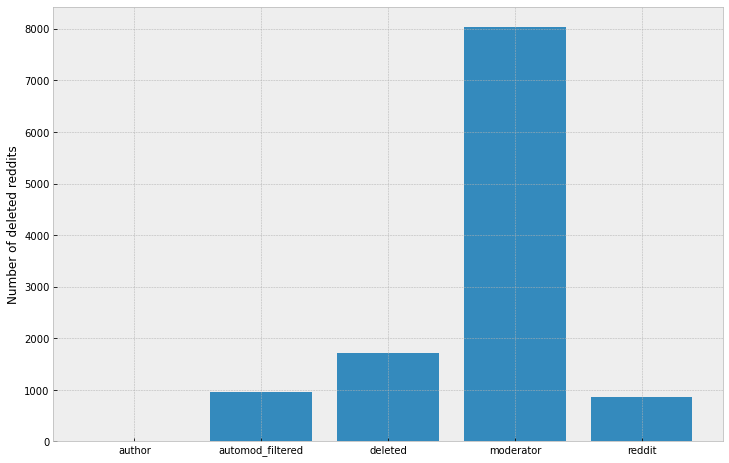

In [60]:
# visualize bar chart based of sql output:

removed_by = grouped_df['removed_by'].tolist()

number_of_removed_post = grouped_df['number_of_removed_post'].tolist()

plt.figure(figsize=(12,8))
plt.ylabel("Number of deleted reddits")
plt.bar(removed_by,number_of_removed_post)

plt.show()

### Who are the top 3 users who had the most their posts removed by moderator?

In [66]:
q3 = """SELECT author, count(removed_by) as no_of_removed_post
FROM df
WHERE removed_by = 'moderator'
group by author
order by no_of_removed_post DESC
LIMIT 5"""

authDEL = ps.sqldf(q3,locals())
authDEL

,author,no_of_removed_post
0,hornedviper9,71
1,kesu11,15
2,ad55mul1994,14
3,jamescdcruz,13
4,hasmi99,12


## Let's find out how many posts with "virus" keyword are removed by moderator.

In [74]:
q4 = """SELECT count(removed_by)
FROM df
WHERE removed_by = 'moderator'
AND title LIKE '%virus%'"""

# print(ps.sqldf(q4,locals()))

removed_moderator_virus = ps.sqldf(q4,locals())
print(removed_moderator_virus.values[0])

[913]


### getting % virus reddits from all removed posts:


In [82]:
q5 = """SELECT count(removed_by)
FROM df
WHERE removed_by LIKE '%moderator%'"""

all_removed_moderator = ps.sqldf(q5,locals())
all_removed_moderator

,count(removed_by)
0,8030


In [84]:
print(removed_moderator_virus/all_removed_moderator)

   count(removed_by)
0           0.113699


From all removed reddits by moderator, 11.37% ~ 12% posts contain the "virus" keyword.

### The most popular reddits
Top 10 reddits with the most number of comments:


In [92]:
q6 = """
SELECT id, title, num_comments
FROM df
WHERE title <> "data_irl"
ORDER BY num_comments DESC
LIMIT 10;
"""

print(ps.sqldf(q6,locals()))

       id                                              title  num_comments
0  7swce8            Police killing rates in G7 members [OC]         10425
1  fqqzki  Worst Episode Ever? The Most Commonly Rated Sh...          9179
2  5zpol9               What's getting cut in Trump's budget          8768
3  4vcxd0  Almost all men are stronger than almost all wo...          7538
4  6hm3p8  America’s new tobacco crisis: The rich stopped...          7418
5  f6stjs     [OC] 2020 Presidential Candidates by Net Worth          7323
6  fzxhsc  Rolls of toilet paper used per person per year...          7303
7  ctq357              Tinder over 3 years (18-21 Male) [OC]          7121
8  8f1rk7  United States of Apathy: 2016 US Presidential ...          7073
9  5c5k4e  I made a chart showing the popular vote turnou...          7058


## The most common words in reddits:
Let's see the word map of the most commonly used words from reddit titles:

In [96]:
# to build a worldcloud , we have to remove NULL values first:
df["title"] = df["title"].fillna(value="")

In [98]:
#Now let's add a string value instead to make our Series clean:
word_string = " ".join(df["title"].str.lower())


(-0.5, 1599.5, 799.5, -0.5)

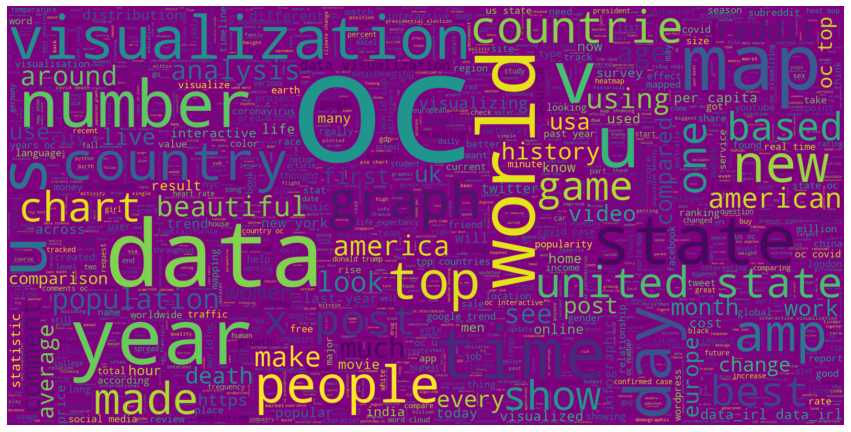

In [100]:
#And - plotting:

plt.figure(figsize=(15,15))
wc = WordCloud(background_color="purple", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off')

## Comment Distribution
The average reddit has less than 25 comments. Let's see the comment distribution for those reddits who have <25 comments:

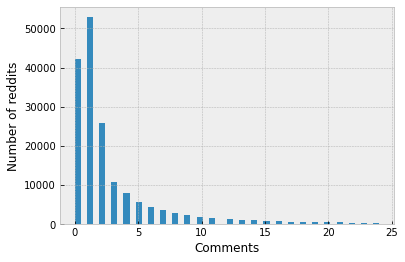

In [102]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["num_comments"] < 25]["num_comments"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="num_comments", ylabel="id")

plt.ylabel("Number of reddits")
plt.xlabel("Comments")

plt.show()

## Correlation between dataset variables
Now let's see how the dataset variables are correlated with each other:

1. How score and comments are correlated?
2. Do they increase and decrease together (positive correlation)?
3. Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

Let's see the correlation table between our dataset variables (numerical and boolean variables only)

In [104]:
df.corr()

,score,total_awards_received,created_utc,num_comments,over_18
score,1.000000,0.327985,0.021763,0.628008,0.017975
total_awards_received,0.327985,1.000000,0.026082,0.207664,0.001987
created_utc,0.021763,0.026082,1.000000,0.022921,0.010344
num_comments,0.628008,0.207664,0.022921,1.000000,0.026616
over_18,0.017975,0.001987,0.010344,0.026616,1.000000


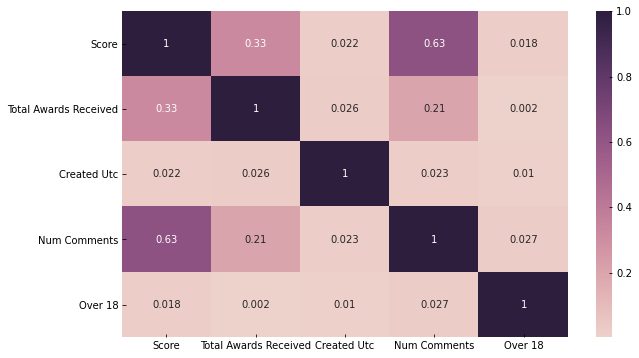

In [106]:
# Now let's visualize the correlation table above using a heatmap
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

## Score Distribution

In [108]:
df.score.describe()

count    183891.000000
mean        186.652131
std        1969.835481
min           0.000000
25%           1.000000
50%           1.000000
75%           5.000000
max      116226.000000
Name: score, dtype: float64

In [110]:
df.score.median()

1.0

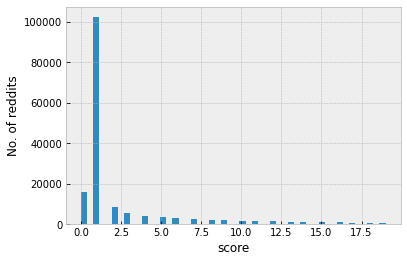

In [119]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["score"] < 20]["score"], kde=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="score", ylabel="No. of reddits")